In [3]:
import os

if os.path.exists("sales_data.db"):
    os.remove("sales_data.db")
    print("Old corrupted database deleted.")
else:
    print("No database found. Ready to create new one.")

Old corrupted database deleted.


File   Edit   View   Insert   Cell   Kernel   Widgets   Help

In [4]:
import os
os.getcwd()

'/drive/notebooks'

Sales Summary:

    product  total_quantity  total_revenue
0  Keyboard              15        22000.0
1    Laptop               8       406000.0
2   Monitor               7        84000.0
3     Mouse              35        17500.0


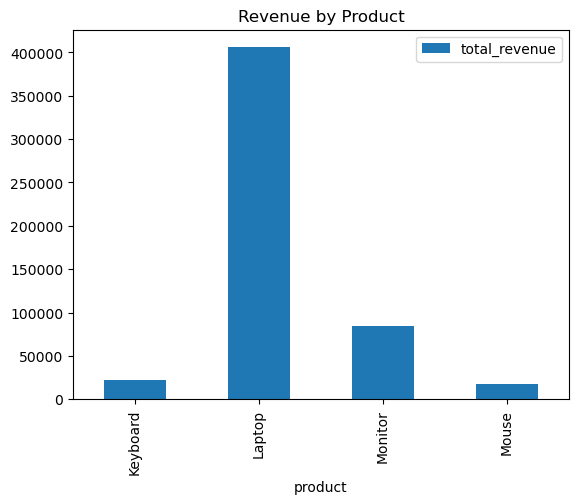

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Create database in memory (SAFE)
conn = sqlite3.connect(":memory:")

# Create table
conn.execute("""
CREATE TABLE sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert data
data = [
    ("Laptop", 5, 50000),
    ("Mouse", 20, 500),
    ("Keyboard", 10, 1500),
    ("Monitor", 7, 12000),
    ("Mouse", 15, 500),
    ("Laptop", 3, 52000),
    ("Keyboard", 5, 1400)
]

conn.executemany("INSERT INTO sales VALUES (?, ?, ?)", data)
conn.commit()

# SQL Query
query = """
SELECT product,
SUM(quantity) as total_quantity,
SUM(quantity * price) as total_revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)

print("Sales Summary:\n")
print(df)

df.plot(kind="bar", x="product", y="total_revenue")
plt.title("Revenue by Product")
plt.show()

conn.close()

<Figure size 640x480 with 0 Axes>

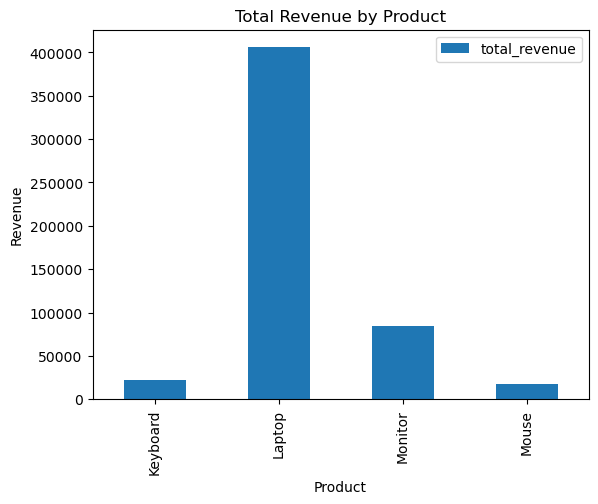

In [9]:
plt.figure()
df.plot(kind="bar", x="product", y="total_revenue")

plt.title("Total Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")

plt.savefig("sales_chart.png")

plt.show()

Sales Summary Analysis

This project uses Python with SQLite, pandas, and matplotlib to analyze sales data.

Steps performed:
• Created a SQLite database and sales table
• Inserted sample product sales data
• Used SQL query to calculate total quantity and total revenue per product
• Loaded the results into pandas DataFrame
• Displayed results using print
• Visualized revenue using a bar chart

Conclusion:
The Laptop generated the highest revenue, followed by Monitor, Keyboard, and Mouse.